# Diplomatura en **Business Analytics** - FCEJ/UdA - **Estadística inferencial**

***Modelo lineal/múltiple***

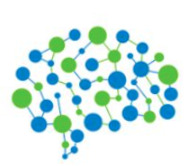

**Ejercicio Nº13** En una empresa de transporte  quieren reducir el tiempo de entrega con el fin de reducir los costos y también aumentar la satisfacción del cliente. Para ello el responsable de logística decide  encontrar  las variables que explican el tiempo de entrega. Se tomó una muestra de 10 entregas y se midió el tiempo en horas y total de Km recorridos:

In [ ]:
#-----------------------------------------------------------------------
#Instalar Librerias
#----------------------------------------------------------------------

install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [ ]:
#-----------------------------------------------------------------------
#Librerias
#----------------------------------------------------------------------
#Libreria grafica
library(ggplot2)
#Libreria test B-P
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




1.Grafique tiempo vs km

In [ ]:
#-------------------------------------------------------------------

tiempo=c(9.3, 4.8, 8.9,6.5,4.2,6.2,7.4,6.0,7.6, 6.1)

km=c(100,50,100,100,50,80, 75,65,90,90)    
     


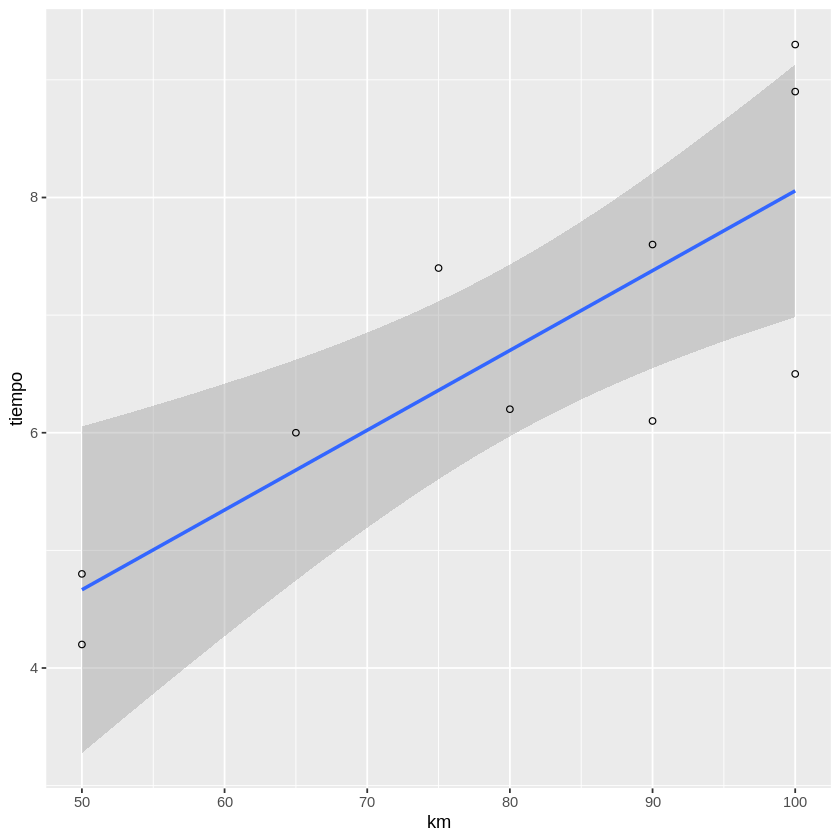

In [ ]:
g=ggplot(data.frame(tiempo=tiempo,km=km),aes(x=km,y=tiempo))
g=g+geom_smooth(method=lm,formula = y ~ poly(x, 1))
g=g+geom_point(shape=1)
g     

2.Estimar el modelo de regresión lineal simple.

In [ ]:
#-------------------------------------------------------------------------
#Modelo lineal simple

modelo_lineal=lm(tiempo~km)

summary(modelo_lineal)   
     


Call:
lm(formula = tiempo ~ km)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5565 -0.4913  0.1783  0.7120  1.2435 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.27391    1.40074   0.909  0.38969   
km           0.06783    0.01706   3.977  0.00408 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.002 on 8 degrees of freedom
Multiple R-squared:  0.6641,	Adjusted R-squared:  0.6221 
F-statistic: 15.81 on 1 and 8 DF,  p-value: 0.00408


3.¿Cuánto tiempo de entrega es explicado por los km recorridos?

In [ ]:
#66%

4.Se sugiere que otra variable explicativa puede ser la cantidad de entregas. Estime el modelo de regresión múltiple

In [ ]:
#-------------------------------------------------------------------------
#Modelo lineal múltiple

entregas=c(4,3,4,2,2,2,3,4,3,2)  


In [ ]:


modelo_lineal_multiple=lm(tiempo~km+entregas)

summary(modelo_lineal_multiple)


Call:
lm(formula = tiempo ~ km + entregas)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79875 -0.32477  0.06333  0.29739  0.91333 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.868701   0.951548  -0.913 0.391634    
km           0.061135   0.009888   6.182 0.000453 ***
entregas     0.923425   0.221113   4.176 0.004157 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5731 on 7 degrees of freedom
Multiple R-squared:  0.9038,	Adjusted R-squared:  0.8763 
F-statistic: 32.88 on 2 and 7 DF,  p-value: 0.0002762


5.¿Cuánto del tiempo de entrega es explicado por los km recorridos y la cantidad de entregas?

In [ ]:
#90%

6.Controle los supuestos del modelo

In [ ]:
        
#---------------------------------------------------------------------------
#Analisis supuestos
#---------------------------------------------------------------------------
#Test de shapiro-Wilks
#---------------------------------------------------------------------------

#H0: Es normal    vs    H1: no es normal

shapiro.test(rstandard(modelo_lineal_multiple))
       


	Shapiro-Wilk normality test

data:  rstandard(modelo_lineal_multiple)
W = 0.97904, p-value = 0.9598


In [ ]:
#-----------------------------------------------------------------------------------
#test Breusch-Pagan test
#----------------------------------------------------------------------------------

#H0: todas las varianzas son iguales vs H1: al menos una es diferente

bptest(modelo_lineal_multiple)




	studentized Breusch-Pagan test

data:  modelo_lineal_multiple
BP = 0.36899, df = 2, p-value = 0.8315


In [ ]:


#--------------------------------------------------------------------------------------
#Durbin-Watson
#--------------------------------------------------------------------------------------
#H0: errores son independientes  vs H1: no son independientes

dwtest(modelo_lineal_multiple)


	Durbin-Watson test

data:  modelo_lineal_multiple
DW = 2.5152, p-value = 0.7998
alternative hypothesis: true autocorrelation is greater than 0


7.¿Existe multicolinealidad entre los Km y la cantidad de entregas?